In [1]:
%matplotlib inline
import numpy as np
from nilearn.maskers import NiftiMapsMasker
from nilearn import datasets

atlas = datasets.fetch_atlas_msdl()
# Loading atlas image stored in 'maps'
atlas_filename = atlas["maps"]
# Loading atlas data stored in 'labels'
labels = atlas["labels"]

# Load the functional datasets
data = datasets.fetch_development_fmri(n_subjects=1)

masker = NiftiMapsMasker(
    maps_img=atlas_filename,
    standardize="zscore_sample",
    memory="nilearn_cache",
    verbose=5,
)
masker.fit(data.func[0])
time_series = masker.transform(data.func[0], confounds=data.confounds)

[NiftiMapsMasker.fit] loading regions from /Users/taylor/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
Resampling maps
[Memory]0.1s, 0.0min    : Loading resample_img...
________________________________________resample_img cache loaded - 0.1s, 0.0min
[Memory]0.2s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min


/opt/miniconda3/envs/salo/lib/python3.9/site-packages/nilearn/_utils/cache_mixin.py:243: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn(


/opt/miniconda3/envs/salo/lib/python3.9/site-packages/nilearn/connectome/connectivity_matrices.py:495: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  covariances_std = [


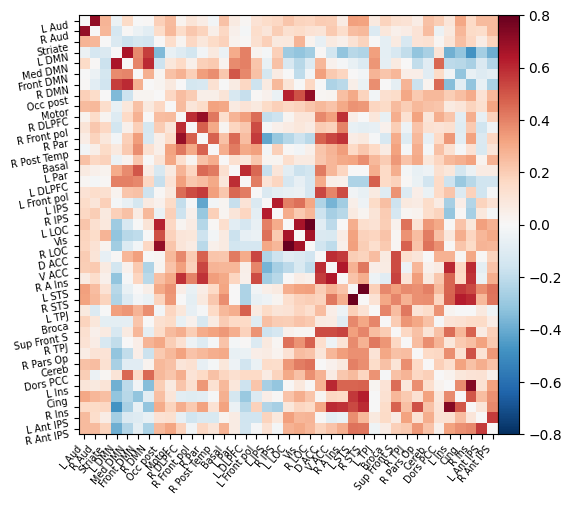

In [2]:
from nilearn.connectome import ConnectivityMeasure

correlation_measure = ConnectivityMeasure(kind="correlation")
correlation_matrix = correlation_measure.fit_transform([time_series])[0]

# Display the correlation matrix
import numpy as np
from nilearn import plotting

# Mask out the major diagonal
np.fill_diagonal(correlation_matrix, 0)
plotting.plot_matrix(
    correlation_matrix,
    labels=labels,
    colorbar=True,
    vmax=0.8,
    vmin=-0.8,
)

/Users/taylor/Documents/tsalo/xDF/xdf/matrix.py:127: RuntimeWarning: divide by zero encountered in arctanh
  z_arr = np.arctanh(r_arr) * np.sqrt(n_cols - 3)


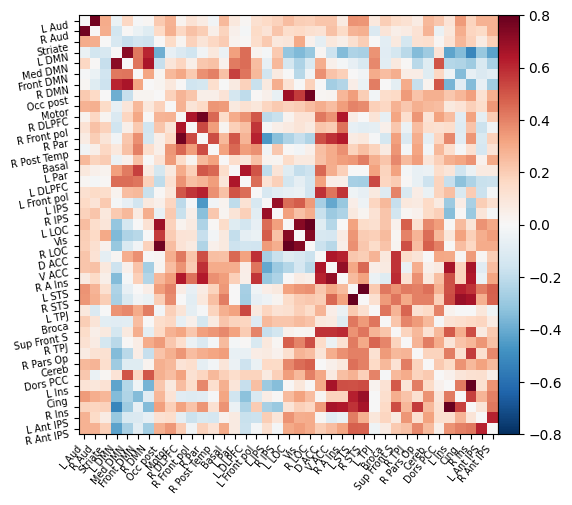

In [3]:
from xdf.xdf import AutocorrPearson

correlation_measure2 = AutocorrPearson()
corr, var = correlation_measure2.fit_transform(time_series)
plotting.plot_matrix(
    corr,
    labels=labels,
    colorbar=True,
    vmax=0.8,
    vmin=-0.8,
)

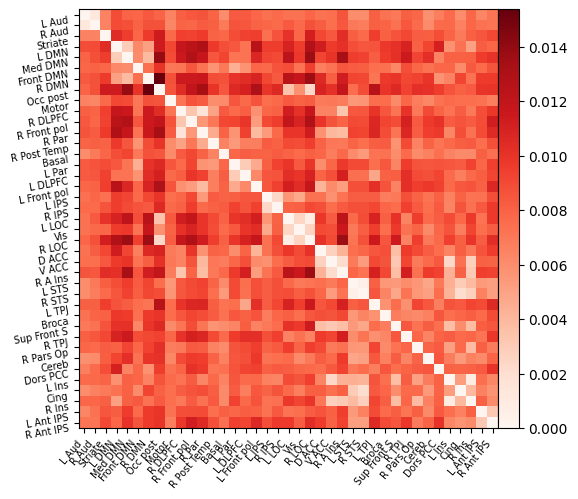

In [4]:
plotting.plot_matrix(
    var,
    labels=labels,
    colorbar=True,
    cmap="Reds",
)

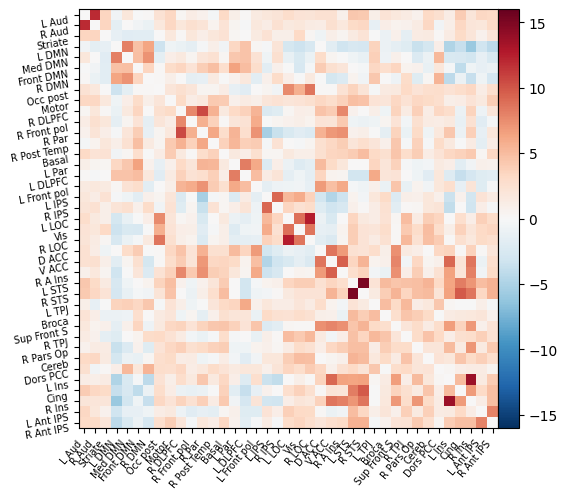

In [5]:
plotting.plot_matrix(
    correlation_measure2.z_corrected_,
    labels=labels,
    colorbar=True,
    vmin=-np.ceil(np.max(np.abs(correlation_measure2.z_corrected_))),
    vmax=np.ceil(np.max(np.abs(correlation_measure2.z_corrected_))),
)